# Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import kurtosis, skew
import statsmodels.api as sm
from scipy.stats import multivariate_normal, norm
from scipy.stats import cauchy 

### 1

In [2]:
class LCG:
    def __init__(self, X0, a=82537, c=23964, d=327):
        self.a = a
        self.c = c
        self.d = d
        self.state = X0
    
    def uniform(self, low=0.0, high=1.0):
        self.state = (self.a * self.state + self.c) % self.d

        return self.state / self.d * (high - low)

In [3]:
my_rng = LCG(1)

In [4]:
my_samples = [my_rng.uniform() for _ in range(200)]

### 2

In [5]:
rng = np.random.default_rng(1)

In [6]:
samples = rng.uniform(size=200)

### 3

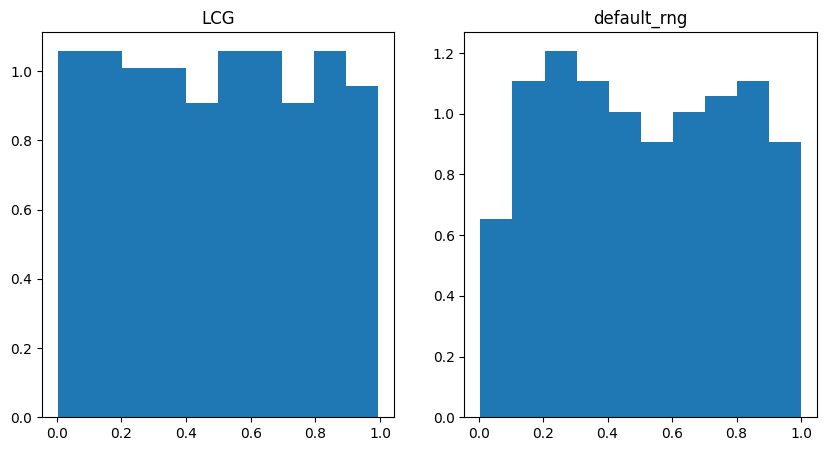

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(my_samples, density=True)
axes[0].set_title('LCG')

axes[1].hist(samples, density=True)
axes[1].set_title('default_rng')

plt.show()

In [8]:
def skew(samples):
    mean = np.mean(samples)
    std = np.std(samples)
    samples_norm = (samples - mean) / std
    return np.mean(samples_norm**3)

def kurtosis(samples):
    mean = np.mean(samples)
    std = np.std(samples)
    samples_norm = (samples - mean) / std
    return np.mean(samples_norm**4)

In [9]:
my_mean = np.mean(my_samples)
my_var = np.var(my_samples)
my_skew = skew(my_samples)
my_kurtosis = kurtosis(my_samples)

np_mean = np.mean(samples)
np_var = np.var(samples)
np_skew = skew(samples)
np_kurtosis = kurtosis(samples)

print(f'True mean={0.5}, var={1/12}, skew={0}, kurtosis={9/5}')
print(f'LCG mean={my_mean}, var={my_var}, skew={my_skew}, kurtosis={my_kurtosis}')
print(f'rng mean={np_mean}, var={np_var}, skew={np_skew}, kurtosis={np_kurtosis}')

True mean=0.5, var=0.08333333333333333, skew=0, kurtosis=1.8
LCG mean=0.4933792048929664, var=0.0831821374463429, skew=0.020924643870618514, kurtosis=1.803170176780179
rng mean=0.5081117533762018, var=0.07784286789139382, skew=0.021133077199404892, kurtosis=1.8387621396031393


Looks like LCG  is closer to the true uniform distribution, than default_rng, because it's n-moments are closer to true one.

### 4

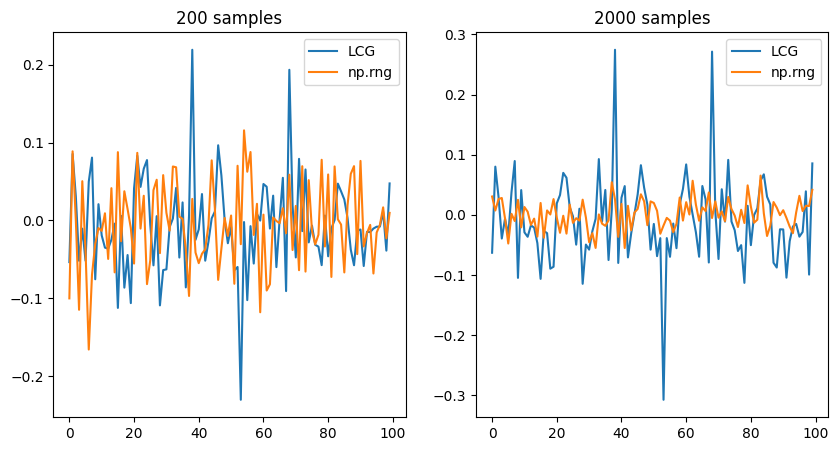

In [10]:
my_samples_2k = [my_rng.uniform() for _ in range(2000)]
samples_2k = rng.uniform(size=2000)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(sm.tsa.acf(my_samples, nlags=100)[1:], label='LCG')
axes[0].plot(sm.tsa.acf(samples, nlags=100)[1:], label='np.rng')
axes[0].set_title('200 samples')
axes[0].legend()

axes[1].plot(sm.tsa.acf(my_samples_2k, nlags=100)[1:], label='LCG')
axes[1].plot(sm.tsa.acf(samples_2k, nlags=100)[1:], label='np.rng')
axes[1].set_title('2000 samples')
axes[1].legend()

plt.show()

For LCG autocorrelations not changed for longer sequences, but for np.default_rng it looks like correlations decreased in absolute values. It became less volatile.

# Problem 2

### 1

Method of inverse transform sampling from P(x) is a method of sampling values from arbitrary distribution. It works as follows:

1) We should find CDF of P(x). Then find inverse of this function ${CDF^{-1}}(x)$.
2) Generate a random number u from U[0,1].
3) Finally, we need to calculate $x = {CDF^{-1}}(u)$. This will be sampled value.

### 2

Let's find normalizing constant

$$P(x) = C \frac{e^{-(x-\lambda)/b}}{(1+e^{-(x-\lambda)/b})^2}$$
$$1=\int\limits_{-\infty}^{+\infty}P(x)dx = \int\limits_{-\infty}^{+\infty}C \frac{e^{-(x-\lambda)/b}}{(1+e^{-(x-\lambda)/b})^2}dx = 
-b\int\limits_{-\infty}^{+\infty}C \frac{e^{-(x-\lambda)/b}}{(1+e^{-(x-\lambda)/b})^2}d\frac{-(x-\lambda)}{b} \\= \{z = \frac{-(x-\lambda)}{b}\} = -b\int\limits_{+\infty}^{-\infty}C \frac{1}{(1+e^z)^2}de^z = \{t=e^z\} = bC\int\limits_{0}^{+\infty} \frac{1}{(1+t)^2}dt = \\ = b*C * -\frac{1}{1+t}|_{0}^{+\infty} = b*C$$
$$C = \frac{1}{b}$$

Now, let's calculate CDF:

$$F_X(x) = \int\limits_{-\infty}^{x}\frac{1}{b} \frac{e^{-(\hat{x}-\lambda)/b}}{(1+e^{-(\hat{x}-\lambda)/b})^2}d\hat{x} = \int\limits_{-\infty}^{x}- \frac{e^{-(\hat{x}-\lambda)/b}}{(1+e^{-(\hat{x}-\lambda)/b})^2}d\frac{-(\hat{x}-\lambda)}{b} = \{z = \frac{-(\hat{x}-\lambda)}{b}\} = \\ \int\limits_{+\infty}^{\frac{-(x-\lambda)}{b}}- \frac{e^{z}}{(1+e^{z})^2}dz = \{t=e^z\} = \int\limits_{+\infty}^{e^{-(x-\lambda)/b}}-\frac{1}{(1+t)^2}dt =  -\frac{1}{1+t}|_{e^{-(x-\lambda)/b}}^{+\infty} = \\ = \frac{1}{1+e^{-(x-\lambda)/b}}$$

And finally, derive inverse CDF:

$$y \in U(0, 1)$$
$$y = \frac{1}{1+e^{-(x-\lambda)/b}} \to 1+e^{-(x-\lambda)/b} = \frac{1}{y} \to e^{-(x-\lambda)/b} = \frac{1}{y} - 1 = \frac{\lambda - x}{b} = \ln(\frac{1 - y}{y}) \to x = \lambda - b\ln(\frac{1 - y}{y})$$

### 3

In [12]:
class My_Distribution:
    def __init__(self, shift, scale):
        self.shift = shift
        self.scale = scale

    def sample(self, size=1):
        y = np.random.uniform(0, 1, size)
        x = self.shift - self.scale * np.log((1 - y) / y)

        return x

In [13]:
my_rng = My_Distribution(6, 3)
samples = my_rng.sample(5000)

### 4

In [14]:
def pdf(x, shift=6, scale=3):
    power = -(x - shift) / scale
    return 1 / scale * (np.exp(power) / (1 + np.exp(power))**2)

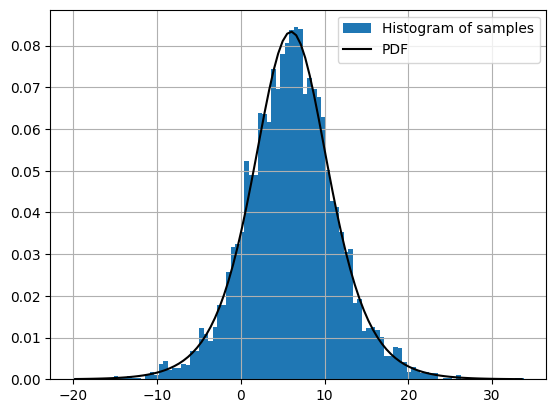

In [15]:
fig, ax0 = plt.subplots(ncols=1, nrows=1) 
(values, bins, _) = ax0.hist(samples, bins=100, density=True, label="Histogram of samples")
bin_centers = 0.5*(bins[1:] + bins[:-1])
true_pdf = pdf(bin_centers)
ax0.plot(bin_centers, true_pdf, label="PDF",color='black')
ax0.legend()
plt.grid()
plt.show()

# Problem 3

### 1

Let's find answer via characteristic functions:

$$G_X(k) = \int\limits_{-\infty}^{+\infty}e^{ikx} \frac{1}{\pi(1+x^2)}dx = e^{-|k|}$$
$$G_{X_1 + X_2}(k) = G_{X_1}(k) * G_{X_2}(k) = e^{-2|k|} = e^{-|2k|} = \int\limits_{-\infty}^{+\infty} \frac{e^{ik2x}}{\pi(1+x^2)}dx = \\  = \{t = 2x\} = \int\limits_{-\infty}^{+\infty}\frac{e^{ikt}}{2\pi(1+\frac{t^2}{4})}dt \to X_1 + X_2 \sim Cauchy(0, 2) = \frac{1}{2\pi(1+\frac{t^2}{4})}$$

### 2

In [17]:
rng = np.random.default_rng()
X1 = rng.standard_cauchy(50000)
X2 = rng.standard_cauchy(50000)
Z = X1 + X2

### 3

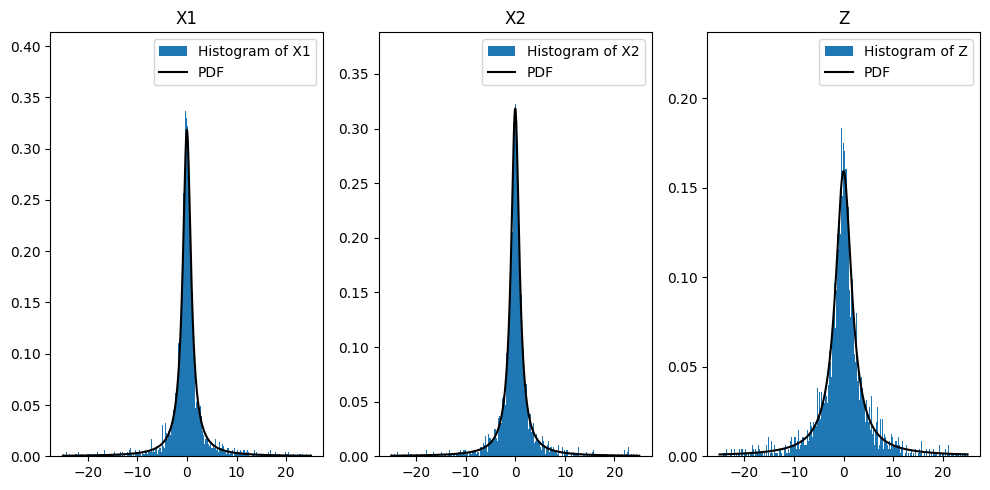

In [18]:
fig, axes= plt.subplots(1, 3, figsize=(10, 5))

(values, bins, _) = axes[0].hist(X1, bins=5000, range=[-25, 25], density=True, label="Histogram of X1")
bin_centers = 0.5*(bins[1:] + bins[:-1])
true_pdf = cauchy.pdf(bin_centers)
axes[0].plot(bin_centers, true_pdf, label="PDF", color='black')
axes[0].legend()
axes[0].set_title('X1')

(values, bins, _) = axes[1].hist(X2, bins=5000, range=[-25, 25], density=True, label="Histogram of X2")
bin_centers = 0.5*(bins[1:] + bins[:-1])
true_pdf = cauchy.pdf(bin_centers)
axes[1].plot(bin_centers, true_pdf, label="PDF", color='black')
axes[1].legend()
axes[1].set_title('X2')

(values, bins, _) = axes[2].hist(Z, bins=5000, range=[-25, 25], density=True, label="Histogram of Z")
bin_centers = 0.5*(bins[1:] + bins[:-1])
true_pdf = cauchy.pdf(bin_centers, scale=2)
axes[2].plot(bin_centers, true_pdf, label="PDF", color='black')
axes[2].legend()
axes[2].set_title('Z')

plt.tight_layout()
plt.show()

### 4

Distribution called stable, if $aX_1 + bX_2 \stackrel{d}{=} cX + d$. As we can see from graphs above, third graph looks like scaled by 2. Values on y-axis are just smaller in 2 times. So, intuitively, Cauchy distribution can be called stable, since we examine $X_1 + X_2 \stackrel{d}{=} 2X$

Through characteristic function, we can see that $G_{aX_1 + bX_2}(k) = G_{aX_1}(k) * G_{bX_2}(k) = \\ = e^{-(a+b)|k|} = G_{(a+b)X}(k) \to aX_1 + bX_2 \stackrel{d}{=} (a+b)X, \forall a,b>0$. Indeed, Cauchy distribution is stable.

# Problem 4

### 1

In [20]:
class RNG_uniform_corr:
    def __init__(self, r):
        self.mean = [0, 0]
        self.cov = [[1, r], [r, 1]]
        self.r = r
        self.multi_norm_sampler = multivariate_normal(self.mean, self.cov)

    def sample(self, size=1):
        multi_samples = self.multi_norm_sampler.rvs(size)
        cdfs = np.array(norm.cdf(multi_samples)).reshape(size, -1)

        return cdfs[:, 0], cdfs[:, 1]

### 2

In [21]:
my_rng_1 = RNG_uniform_corr(0.0)
my_rng_2 = RNG_uniform_corr(0.5)
my_rng_3 = RNG_uniform_corr(0.9)

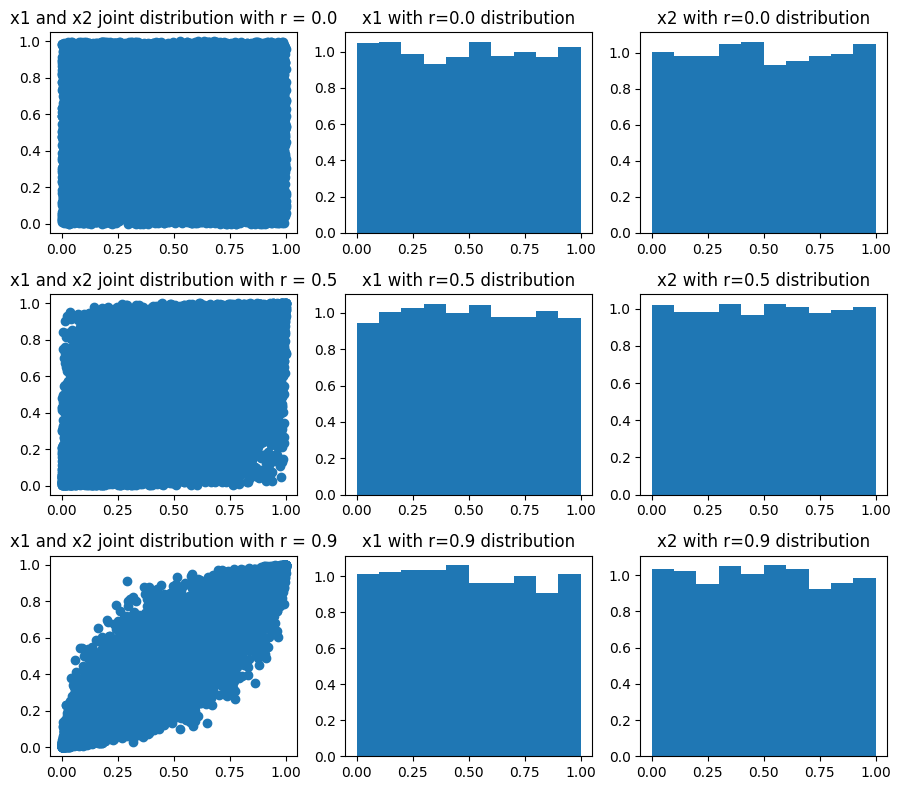

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(9, 8))

for i, rng in enumerate([my_rng_1, my_rng_2, my_rng_3]):
    ax = axes[i]
    x1, x2 = rng.sample(10000)
    ax[0].scatter(x1, x2)
    ax[0].set_title(f'x1 and x2 joint distribution with r = {rng.r}')
    ax[1].hist(x1, density=True)
    ax[1].set_title(f'x1 with r={rng.r} distribution')
    ax[2].hist(x2, density=True)
    ax[2].set_title(f'x2 with r={rng.r} distribution')


plt.tight_layout()
plt.show()

As we can see, x1 and x2 are distributed uniformly in all cases, but joint distributions are differ. With increase of r, points start to gather around y=x line. 